# CS Research-A-Thon

## Shirley Wang
## Qiwei Shao
## Yuya Asano

# Question

Choose a language feature and a family of languages.  Determine whether the language feature is correlated with other properties of the language such as geographical information.

In [299]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [79]:
redvsyellow = pd.read_excel('redvsyellow.xlsx')
redvsyellow = redvsyellow.rename(columns={'Name': 'Red and Yellow'})
redvsyellow = redvsyellow.drop(columns = ['Frequency', 'Confidence', 'References', 'Parameter'])
bluevsgreen = pd.read_excel('bluevsgreen.xlsx')
bluevsgreen = bluevsgreen.rename(columns={'Name': 'Green and Blue'})
bluevsgreen = bluevsgreen.drop(columns = ['Frequency', 'Confidence', 'References', 'Parameter', 'ID'])
basiccats = pd.read_excel('numberbasiccats.xlsx')
basiccats = basiccats.rename(columns={'Name': 'Basic Colour Categories'})
basiccats = basiccats.drop(columns = ['Frequency', 'Confidence', 'References', 'Parameter', 'ID'])
nonderived = pd.read_excel('numbernonderived.xlsx')
nonderived = nonderived.rename(columns={'Name': 'Non-Derived Basic Colour Categories'})
nonderived = nonderived.drop(columns = ['Frequency', 'Confidence', 'References', 'Parameter', 'ID'])

the closer the place is to the equator, the less basic nonderived color categories they have

In [98]:
coloursdf = pd.merge(bluevsgreen, redvsyellow, on = 'Language')
coloursdf = pd.merge(coloursdf, basiccats, on = 'Language')
coloursdf = pd.merge(coloursdf, nonderived, on = 'Language')

locationdf = pd.read_table('https://wals.info/languoid.tab?sEcho=1&iSortingCols=1&iSortCol_0=0&sSortDir_0=asc')

locationdf = locationdf.rename(columns = {'name': 'Language'})
coloursdf = pd.merge(locationdf, coloursdf, on='Language', how='inner')
coloursdf = coloursdf.drop(columns=['ID', 'glottocode'])

coloursdf.head()

,wals code,Language,latitude,longitude,macroarea,genus,family,sample 100,sample 200,Green and Blue,Red and Yellow,Basic Colour Categories,Non-Derived Basic Colour Categories
0,cav,Cavineña,-13.333333,-66.500000,South America,Tacanan,Tacanan,False,False,Green/blue,Red vs. yellow,6-6.5,5.0
1,oca,Ocaina,-2.750000,-71.750000,South America,Huitoto,Huitotoan,False,False,Green/blue,Red vs. yellow,6-6.5,5.0
2,brk,Berik,-2.250000,138.833333,Papunesia,Tor,Tor-Orya,False,False,Green/blue,Red vs. yellow,4.5-5.5,5.0
3,prh,Pirahã,-7.000000,-62.000000,South America,Mura,Mura,True,True,Green/blue,Red/yellow,3-4,4.0
4,amk,Amarakaeri,-12.500000,-70.500000,South America,Harakmbet,Harakmbet,False,False,Green/blue,Red vs. yellow,6-6.5,5.5


In [109]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns
sns.set()

coloursdf['Coordinates'] = list(zip(coloursdf.longitude, coloursdf.latitude))
coloursdf['Coordinates'] = coloursdf['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(coloursdf, geometry='Coordinates')

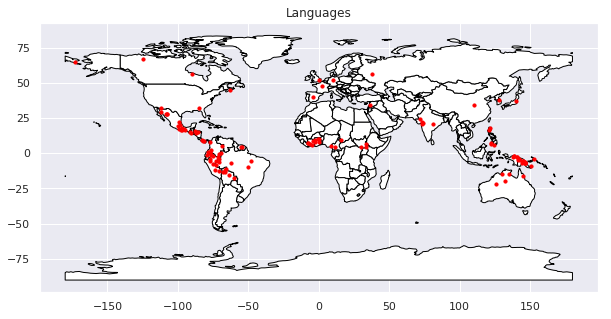

In [139]:
fig, ax = plt.subplots(figsize=(10, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=10)
ax.set_title('Languages')
plt.show()

In [149]:
redvsyellow = coloursdf[coloursdf['Red and Yellow'] == 'Red vs. yellow']
redyellow = coloursdf[coloursdf['Red and Yellow'] == 'Red/yellow']
yellowgreenblue = coloursdf[coloursdf['Red and Yellow'] == 'Yellow/green/blue vs. red']
none = coloursdf[coloursdf['Red and Yellow'] == 'None']
yellowgreen = coloursdf[coloursdf['Red and Yellow'] == 'Yellow/green vs. red']

In [306]:
def drawthing(data, color, label):
    gdf = gpd.GeoDataFrame(data, geometry='Coordinates')
    gdf.plot(ax=ax, color=color, markersize=20, label = label)

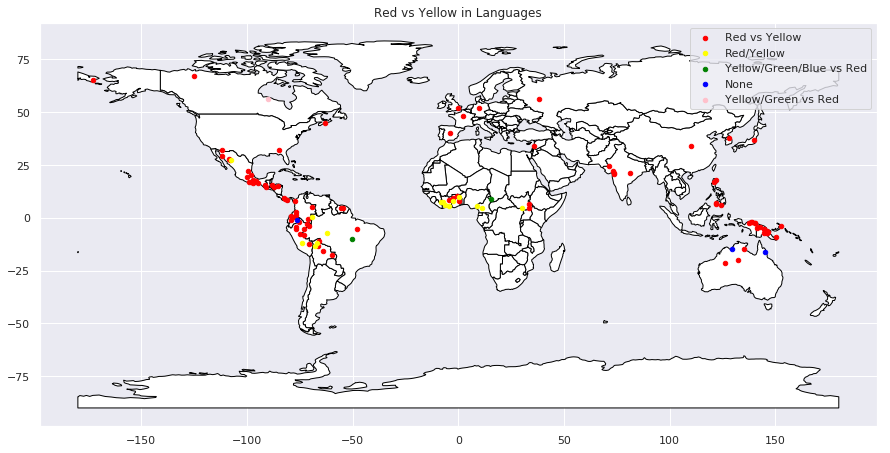

In [309]:
fig, ax = plt.subplots(figsize=(15, 15))
world.plot(ax=ax, color='white', edgecolor='black')
drawthing(redvsyellow, 'red', 'Red vs Yellow')
drawthing(redyellow, 'yellow', 'Red/Yellow')
drawthing(yellowgreenblue, 'green', 'Yellow/Green/Blue vs Red')
drawthing(none, 'blue', 'None')
drawthing(yellowgreen, 'pink', 'Yellow/Green vs Red')
ax.legend()
ax.set_title('Red vs Yellow in Languages')
plt.show()

In [310]:
greenblue = coloursdf[coloursdf['Green and Blue'] == 'Green/blue']
greenvsblue = coloursdf[coloursdf['Green and Blue'] == 'Green vs. blue']
blackgreenblue = coloursdf[coloursdf['Green and Blue'] == 'Black/green/blue']
yellowgreenblue = coloursdf[coloursdf['Green and Blue'] == 'Yellow/green/blue']
blackblue = coloursdf[coloursdf['Green and Blue'] == 'Black/blue vs. green']
none = coloursdf[coloursdf['Red and Yellow'] == 'None']
yellowgreen = coloursdf[coloursdf['Green and Blue'] == 'Yellow/green vs. blue']

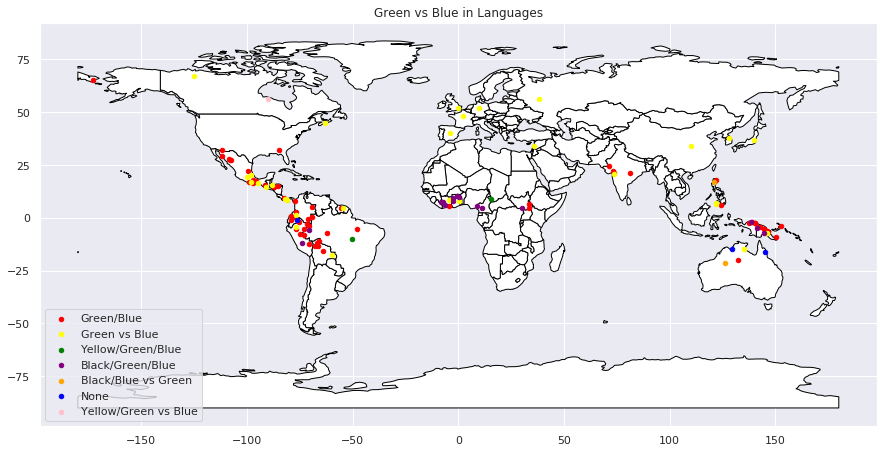

In [311]:
fig, ax = plt.subplots(figsize=(15, 15))
world.plot(ax=ax, color='white', edgecolor='black')
drawthing(greenblue, 'red', 'Green/Blue')
drawthing(greenvsblue, 'yellow', 'Green vs Blue')
drawthing(yellowgreenblue, 'green', 'Yellow/Green/Blue')
drawthing(blackgreenblue, 'purple', 'Black/Green/Blue')
drawthing(blackblue, 'orange', 'Black/Blue vs Green')
drawthing(none, 'blue', 'None')
drawthing(yellowgreen, 'pink', 'Yellow/Green vs Blue')
ax.legend()
ax.set_title("Green vs Blue in Languages")
plt.show()

In [254]:
def getaveragecolorcat(range):
    data = range.split('-')
    if len(data) == 1:
        return float(data[0])
    else:
        return (float(data[0]) + float(data[1])) / 2

coloursdf['Basic Colour Categories Average'] = [getaveragecolorcat(x) for x in coloursdf['Basic Colour Categories']]

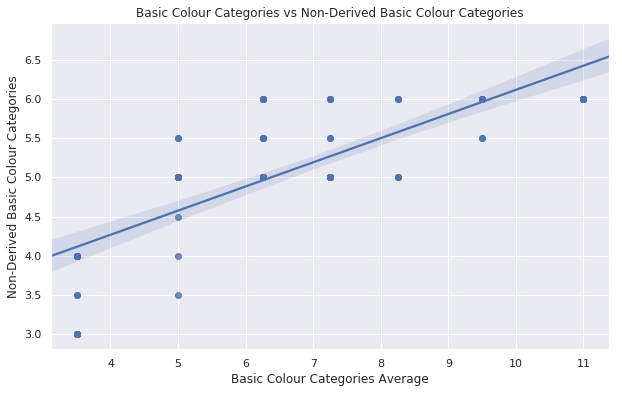

In [300]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.regplot('Basic Colour Categories Average', 'Non-Derived Basic Colour Categories', data=coloursdf)
axs.set_title("Basic Colour Categories vs Non-Derived Basic Colour Categories")
plt.show()

In [259]:
tea = pd.read_excel('tea.xlsx')
tea = tea.rename(columns={'Name': 'Tea'})
tea = tea.drop(columns=['ID', 'Parameter', 'Frequency', 'Confidence', 'References'])

In [260]:
teaandlocation = pd.merge(tea, locationdf, on = 'Language', how = 'inner')
teaandlocation.groupby('macroarea')['Tea'].describe()

,count,unique,top,freq
macroarea,,,,
Africa,50,3,Words derived from Sinitic cha,24
Australia,6,2,Others,5
Eurasia,126,3,Words derived from Sinitic cha,77
None,2,2,Words derived from Min Nan Chinese te,1
North America,18,3,Others,10
Papunesia,25,3,Words derived from Min Nan Chinese te,18
South America,3,1,Words derived from Min Nan Chinese te,3


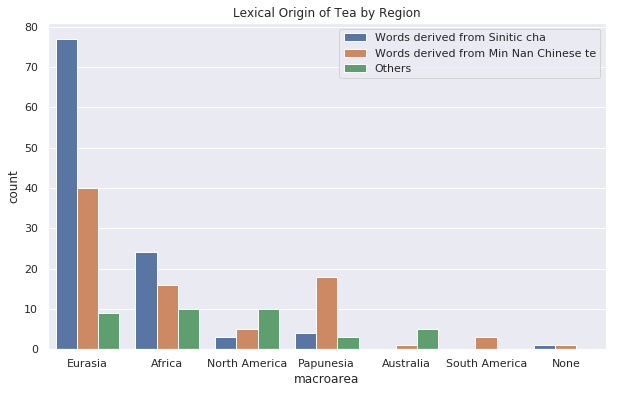

In [301]:
# we should look more in depth at this through looking at Chinese migration
fig, axs = plt.subplots(figsize = (10, 6))
sns.countplot(x = 'macroarea', hue = 'Tea', data = teaandlocation, ax = axs)
axs.legend(loc='upper right')
axs.set_title("Lexical Origin of Tea by Region")
plt.show()

In [262]:
teaandcolours = pd.merge(coloursdf, tea, on = 'Language', how='inner')

In [263]:
teaandcolours.groupby('Tea')['Red and Yellow'].describe()

,count,unique,top,freq
Tea,,,,
Words derived from Min Nan Chinese te,4,1,Red vs. yellow,4
Words derived from Sinitic cha,4,1,Red vs. yellow,4


In [264]:
genders = pd.read_excel('genders.xlsx')
genders = genders.rename(columns={'Name': 'Number of Genders'})
genders = genders.drop(columns=['ID', 'Parameter', 'Frequency', 'Confidence', 'References'])

In [265]:
genderandlocation = pd.merge(genders, locationdf, on = 'Language', how = 'inner')
genderandlocation.groupby('macroarea')['Number of Genders'].describe()

,count,unique,top,freq
macroarea,,,,
Africa,49,5,Five or more,16
Australia,24,5,None,13
Eurasia,78,5,None,42
North America,40,4,None,32
Papunesia,41,5,None,32
South America,25,4,None,15


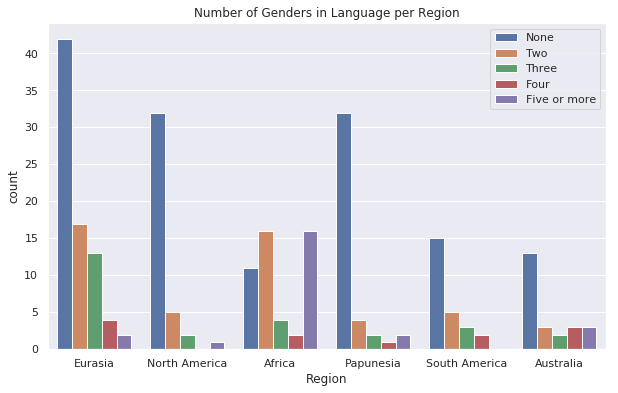

In [302]:
fig, axs = plt.subplots(figsize = (10, 6))
sns.countplot(x = 'macroarea', hue = 'Number of Genders', data = genderandlocation, 
              ax = axs, hue_order=['None', 'Two', 'Three', 'Four', 'Five or more'])
axs.set_title("Number of Genders in Language per Region")
axs.set_xlabel("Region")
axs.legend(loc='upper right')
plt.show()

In [280]:
genderandcolours = pd.merge(coloursdf, genders, on = 'Language', how='inner')
genderandcolours.groupby('Number of Genders')['Red and Yellow'].describe()

,count,unique,top,freq
Number of Genders,,,,
Four,1,1,Red/yellow,1
None,6,1,Red vs. yellow,6
Three,3,1,Red vs. yellow,3
Two,5,3,Red vs. yellow,3


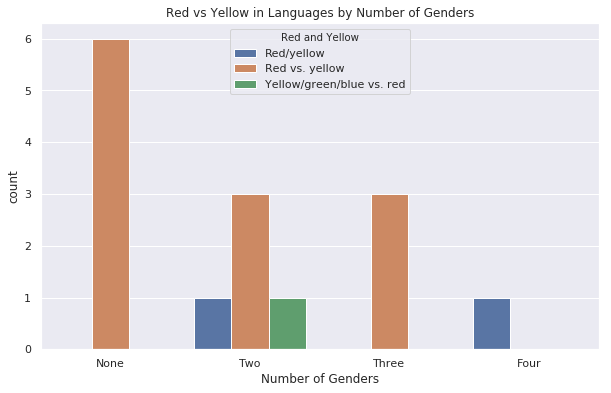

In [292]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.countplot(x='Number of Genders', hue='Red and Yellow', data=genderandcolours, order=['None', 'Two', 'Three', 'Four'])
axs.set_title("Red vs Yellow in Languages by Number of Genders")
plt.show()

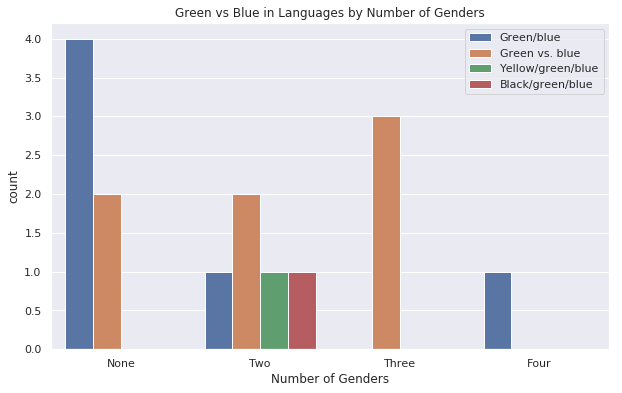

In [294]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.countplot(x='Number of Genders', hue='Green and Blue', data=genderandcolours, order=['None', 'Two', 'Three', 'Four'])
axs.set_title("Green vs Blue in Languages by Number of Genders")
axs.legend(loc='upper right')
plt.show()

In [283]:
teaandgender = pd.merge(tea, genders, on = 'Language', how='inner')
teaandgender.groupby('Number of Genders')['Tea'].describe()

,count,unique,top,freq
Number of Genders,,,,
Five or more,7,3,Words derived from Min Nan Chinese te,4
Four,2,2,Others,1
None,39,3,Words derived from Sinitic cha,20
Three,8,3,Words derived from Sinitic cha,4
Two,21,3,Words derived from Sinitic cha,10


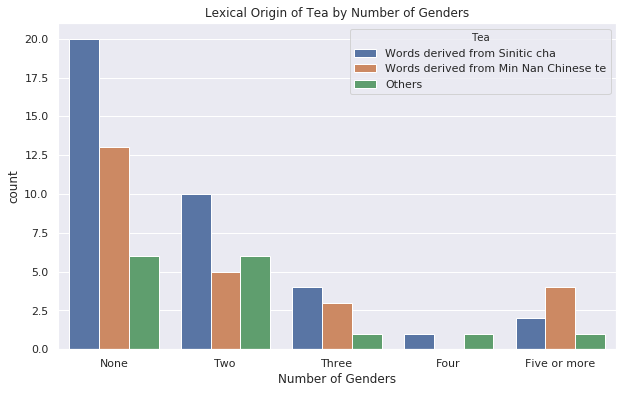

In [295]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.countplot(x='Number of Genders', hue='Tea', data=teaandgender, order=['None', 'Two', 'Three', 'Four', 'Five or more'])
axs.set_title("Lexical Origin of Tea by Number of Genders")
plt.show()

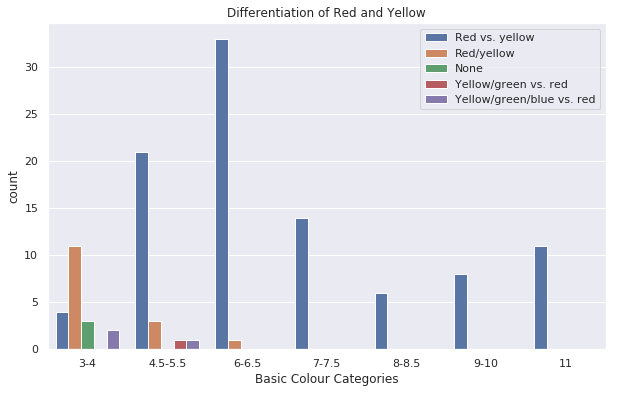

In [304]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.countplot(x='Basic Colour Categories', hue='Red and Yellow', data=coloursdf, \
              order=['3-4', '4.5-5.5', '6-6.5', '7-7.5', '8-8.5', '9-10', '11'], \
              hue_order=['Red vs. yellow', 'Red/yellow', 'None', 'Yellow/green vs. red', 'Yellow/green/blue vs. red'])
axs.set_title("Differentiation of Red and Yellow")
axs.legend(loc='upper right')
plt.show()

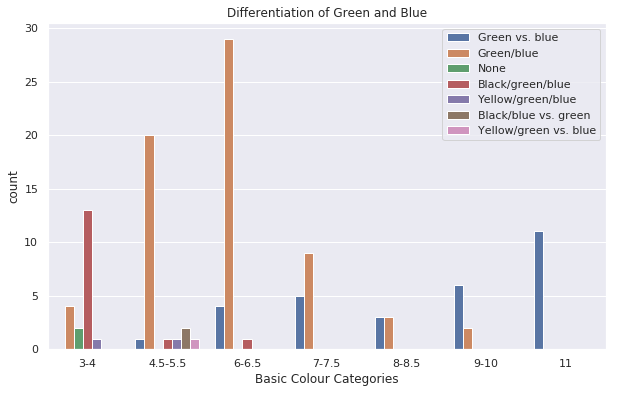

In [305]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.countplot(x='Basic Colour Categories', hue='Green and Blue', data=coloursdf, \
              order=['3-4', '4.5-5.5', '6-6.5', '7-7.5', '8-8.5', '9-10', '11'], \
             hue_order=['Green vs. blue', 'Green/blue', 'None', 'Black/green/blue', 'Yellow/green/blue', 'Black/blue vs. green', 'Yellow/green vs. blue'])
axs.set_title("Differentiation of Green and Blue")
axs.legend(loc='upper right')
plt.show()